In [1]:
import cv2 as cv
import pickle
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
from matplotlib import pyplot as plt
InteractiveShell.ast_node_interactivity = "all"

In [68]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [69]:
d = unpickle('../data/data_batch_1')

In [70]:
s_visited = [0] * 10
pic_array = []
total = 0
for index, labels in enumerate(d[b'labels']):
    if s_visited[labels] == 0:
        pic_array.append(d[b'data'][index].reshape(3, 32, 32))
        total += 1
        s_visited[labels] = 1
        if total >= 10:
            break

In [71]:
len(pic_array)

10

In [74]:
def show_pic(img, rank):

    img = img.transpose(1, 2, 0)
    
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    img_np32 = np.float32(gray)
    
    harris = cv.cornerHarris(img_np32, 2, 3, 0.04)
    marked = cv.dilate(harris, None)
    res = img.copy()
    res[marked > 0.05 * marked.max()] = [255, 0, 0]
    
    plt.figure()
    f, axarr = plt.subplots(1, 4, figsize=(15, 15)) 
    axarr[0].imshow(gray, cmap='gray', vmin=0, vmax=255)
    axarr[1].imshow(harris, cmap='gray', vmin=0, vmax=255)
    axarr[2].imshow(marked, cmap='gray', vmin=0, vmax=255)
    axarr[3].imshow(res)
    plt.show()
    
    harris_7 = cv.cornerHarris(img_np32, 2, 3, 0.07)
    marked_7 = cv.dilate(harris_7, None)
    res_7 = img.copy()
    res_7[marked_7 > 0.05 * marked_7.max()] = [255, 0, 0]

    plt.figure()
    f, axarr = plt.subplots(1, 4, figsize=(15, 15)) 
    axarr[0].imshow(gray, cmap='gray', vmin=0, vmax=255)
    axarr[1].imshow(harris_7, cmap='gray', vmin=0, vmax=255)
    axarr[2].imshow(marked_7, cmap='gray', vmin=0, vmax=255)
    axarr[3].imshow(res_7)
    plt.show()
    
    cv.imwrite('../data/HW1/problem3_results/{}_img.jpg'.format(rank), cv.cvtColor(img, cv.COLOR_RGB2BGR))
    cv.imwrite('../data/HW1/problem3_results/{}_img.jpg'.format(rank), cv.cvtColor(harris, cv.COLOR_RGB2BGR))
    cv.imwrite('../data/HW1/problem3_results/{}_img.jpg'.format(rank), cv.cvtColor(harris_7, cv.COLOR_RGB2BGR))

<Figure size 432x288 with 0 Axes>

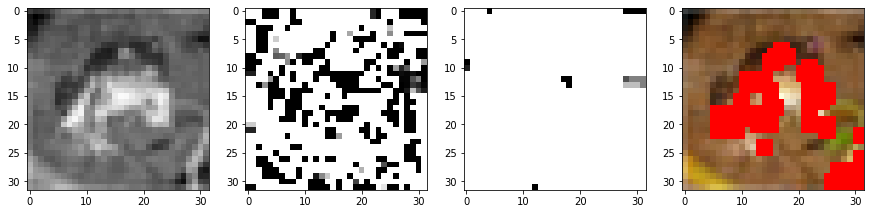

<Figure size 432x288 with 0 Axes>

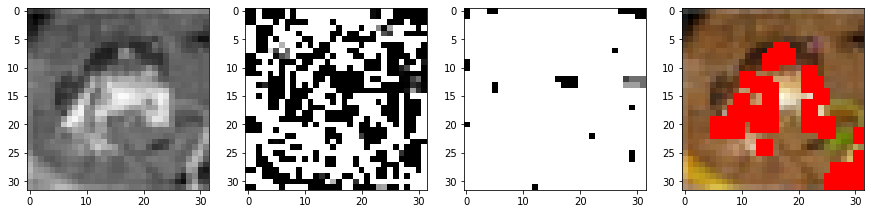

<Figure size 432x288 with 0 Axes>

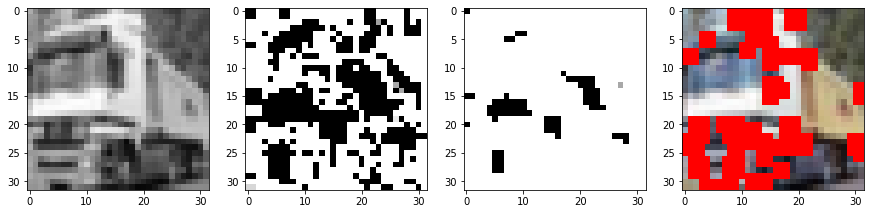

<Figure size 432x288 with 0 Axes>

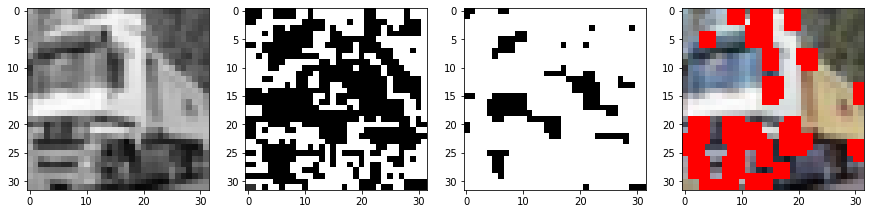

<Figure size 432x288 with 0 Axes>

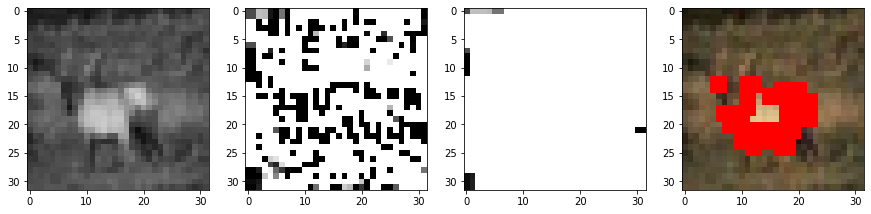

<Figure size 432x288 with 0 Axes>

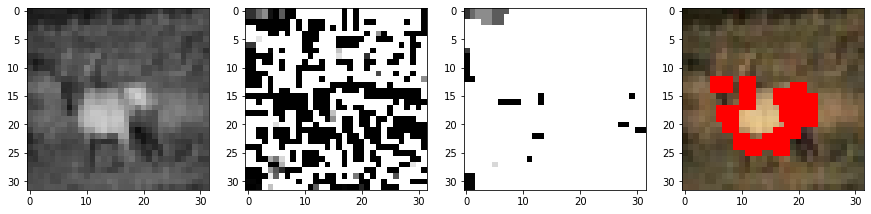

<Figure size 432x288 with 0 Axes>

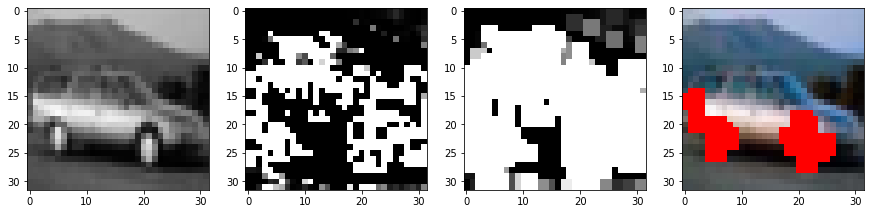

<Figure size 432x288 with 0 Axes>

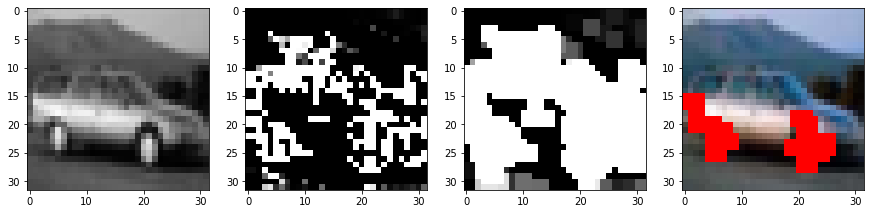

<Figure size 432x288 with 0 Axes>

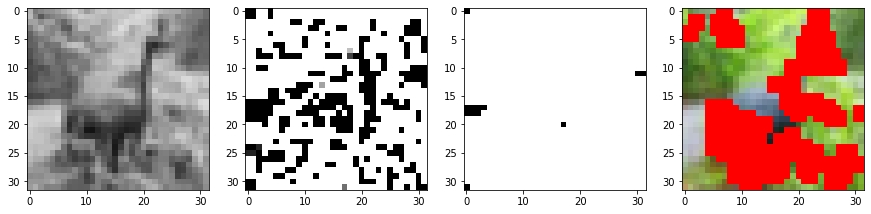

<Figure size 432x288 with 0 Axes>

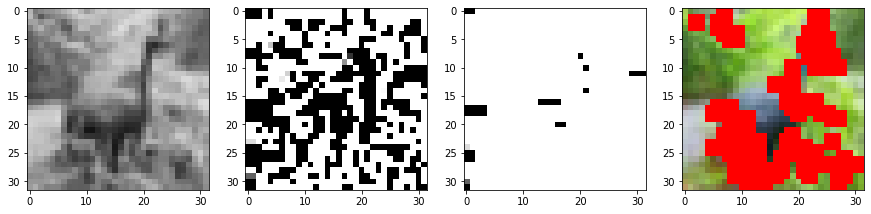

<Figure size 432x288 with 0 Axes>

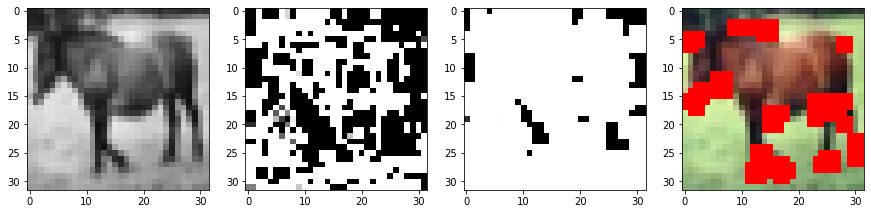

<Figure size 432x288 with 0 Axes>

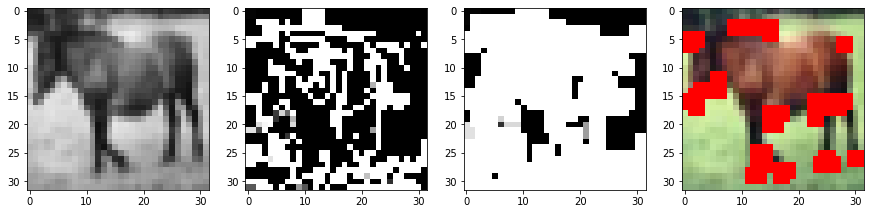

<Figure size 432x288 with 0 Axes>

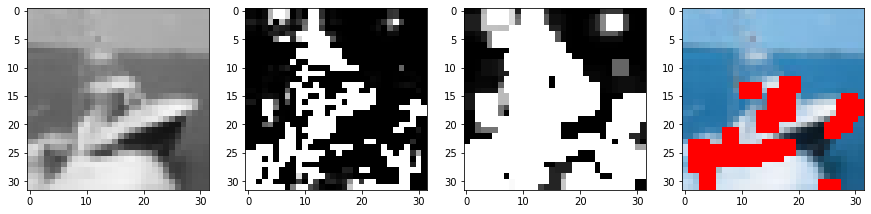

<Figure size 432x288 with 0 Axes>

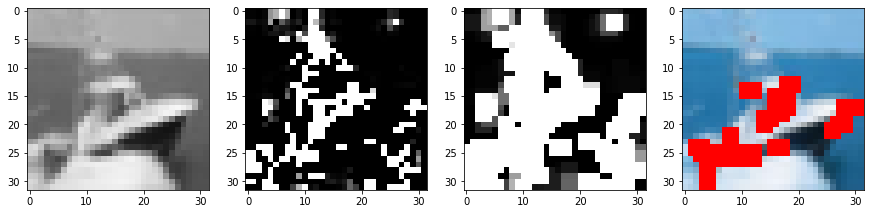

<Figure size 432x288 with 0 Axes>

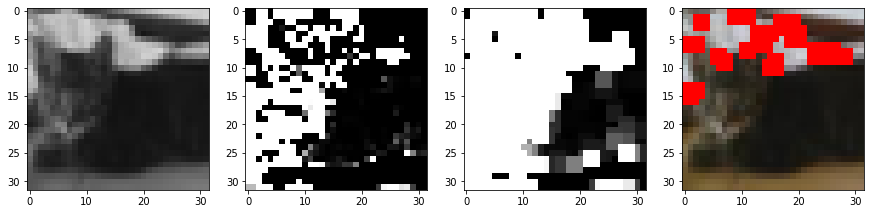

<Figure size 432x288 with 0 Axes>

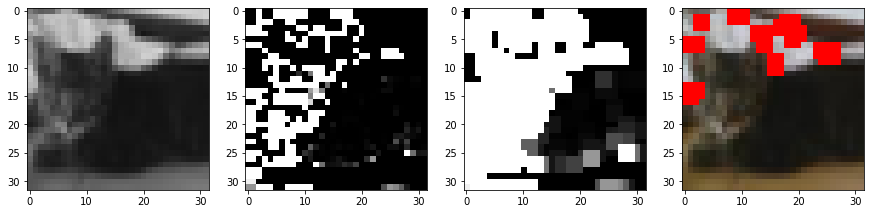

<Figure size 432x288 with 0 Axes>

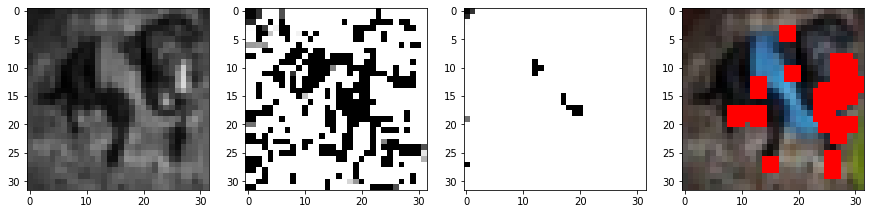

<Figure size 432x288 with 0 Axes>

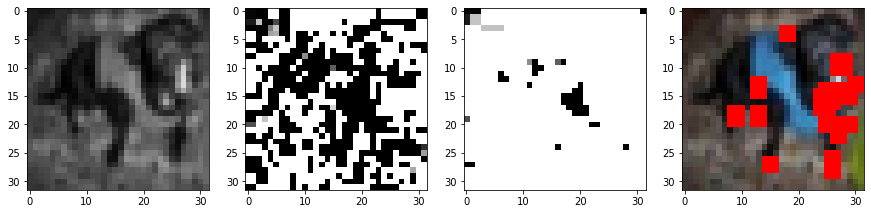

<Figure size 432x288 with 0 Axes>

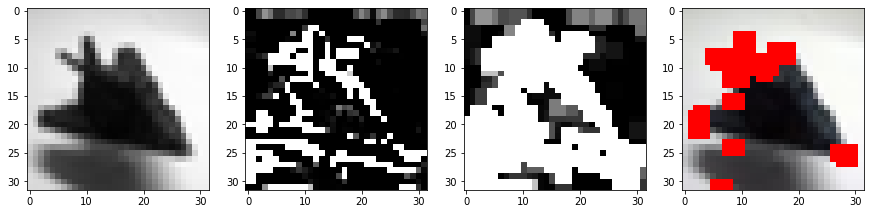

<Figure size 432x288 with 0 Axes>

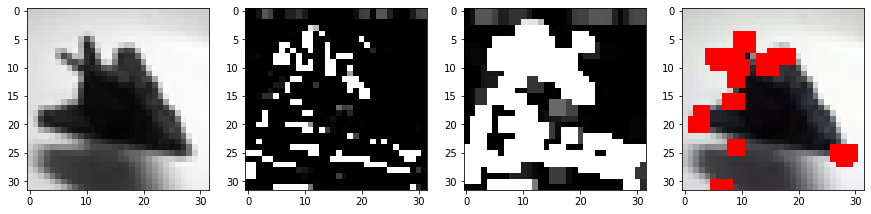

In [75]:
for index, img in enumerate(pic_array):
    show_pic(img, index)